In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 3)

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
X_train.sample(4)

,Age,Fare
622,20.0,15.7417
799,30.0,24.1500
693,25.0,7.2250
142,24.0,15.8500


In [8]:
clf=DecisionTreeClassifier()

In [10]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.6186440677966102

In [13]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6345070422535211

# Using Binning

In [14]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [15]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [16]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.67,  7.8 , 17.  , 19.  , 22.  , 24.  , 25.  , 28.  , 30.  ,
              32.1 , 35.  , 39.  , 42.  , 48.  , 54.  , 80.  ])             ],
      dtype=object)

In [19]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [20]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [21]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
122,32.5,9.0,30.0708,10.0,"(32.1, 35.0]","(26.55, 32.864]"
336,29.0,7.0,66.6000,12.0,"(28.0, 30.0]","(52.0, 76.729]"
864,24.0,5.0,13.0000,6.0,"(22.0, 24.0]","(10.5, 13.0]"
736,48.0,13.0,34.3750,11.0,"(42.0, 48.0]","(32.864, 52.0]"
233,5.0,0.0,31.3875,10.0,"(0.67, 7.8]","(26.55, 32.864]"


In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)



In [23]:
accuracy_score(y_test,y_pred2)

0.6228813559322034

In [24]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6330790297339592

In [25]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    


0.6303208137715179


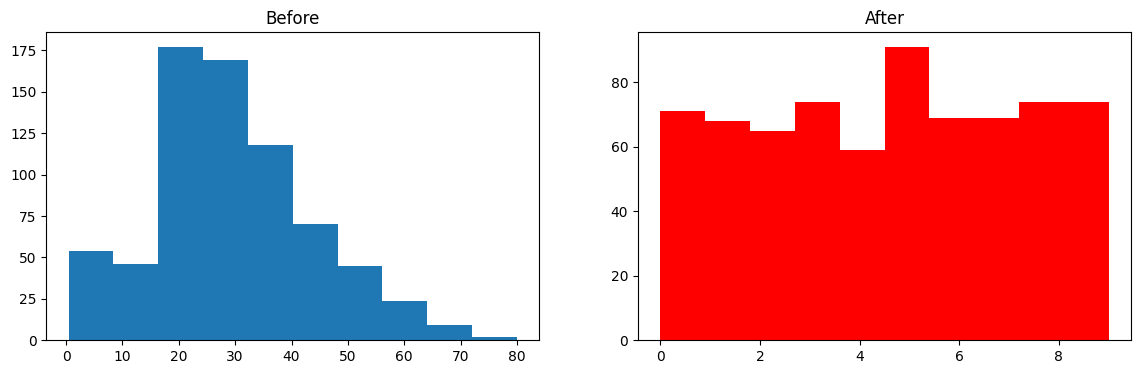

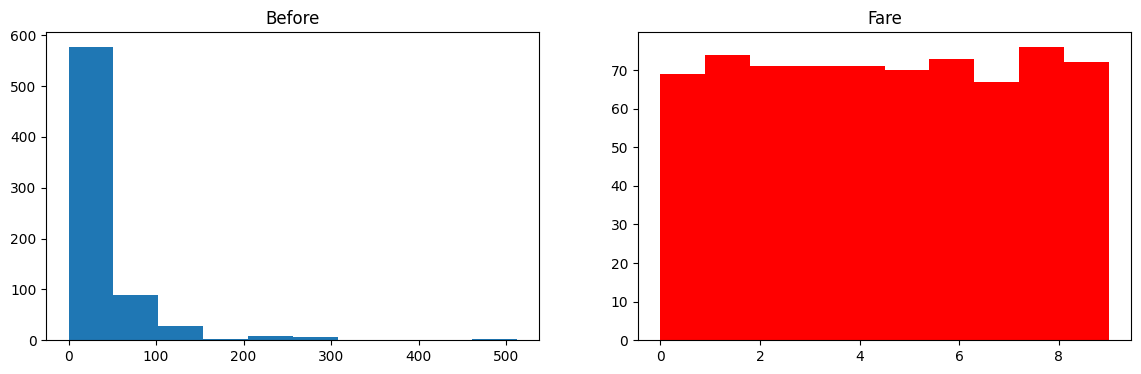

In [28]:
discretize(10,'quantile')
